# Space Server (Classificasion)

Table of Contents

1.  Intoduction
2.  Data Preprocessing
3.  Data Vizualization
4.  EDA
5.  Model Testing
6.  Ensemble Tecniques
7.  GridsearchCv
8.  BestModel
9.  Cross Validation
10. Saving the best Model

# Introduction

The Sloan Digital Sky Survey has created the most detailed three-dimensional maps of the Universe ever made, with deep 
multi-color images of one third of the sky, and spectra for more than three million astronomical objects.The Analysis below,
tries to study the different features of star, galaxy and quasar.

The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 
1 class column which identifies it to be either a star, galaxy or quasar.

Task: Classification

Target:Class


# Data Preprocessing

In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Data
df=pd.read_csv("space.csv")
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [3]:
# checking for unique values and their value counts
for col in df:
    print((col),df[col].unique())
    print(df[col].value_counts())
    print('******************************************************************************************')
    print('\n')

objid [1.23765e+18]
1.237650e+18    10000
Name: objid, dtype: int64
******************************************************************************************


ra [183.5313257 183.5983705 183.6802074 ... 131.5525623 131.4771511
 131.6650121]
226.511352    1
186.864198    1
162.412783    1
242.416598    1
25.765495     1
             ..
218.427367    1
179.365032    1
187.113033    1
235.913493    1
182.372733    1
Name: ra, Length: 10000, dtype: int64
******************************************************************************************


dec [ 0.08969303  0.13528503  0.12618509 ... 51.66698638 51.75306779
 51.80530747]
 0.701145     1
 0.031148     1
 0.322301     1
-0.728211     1
 60.960316    1
             ..
-0.048648     1
 0.321775     1
-3.512726     1
 57.641016    1
 0.661888     1
Name: dec, Length: 10000, dtype: int64
******************************************************************************************


u [19.47406 18.6628  19.38298 ... 18.75818 18.88287 19.2758

Observation:
From above we concluded that column 'objid' & 'rerun' contains same value in every row while column 'ra'& 'dec' contains 
unique values in every row so its clear that they wont contribute in our analysis so is better to drop these columns in 
order to get best accuracy level.

In [4]:
# dropping the columns not necessary

df.drop('objid',axis=1,inplace=True)
df.drop('ra',axis=1,inplace=True)
df.drop('rerun',axis=1,inplace=True)
df.drop('dec',axis=1,inplace=True)
df.drop('specobjid',axis=1,inplace=True)
df.drop('fiberid',axis=1,inplace=True)

In [5]:
# checking for null values
df.isnull().sum()

u           0
g           0
r           0
i           0
z           0
run         0
camcol      0
field       0
class       0
redshift    0
plate       0
mjd         0
dtype: int64

Obsevation: From the above we concluded that our dataset doesnot contain any null values.

In [6]:
#Checking Datatypes 
df.dtypes

u           float64
g           float64
r           float64
i           float64
z           float64
run           int64
camcol        int64
field         int64
class        object
redshift    float64
plate         int64
mjd           int64
dtype: object

Conclusion: Datatset contains all numeric columns except 'class' column which is object column. 

In [7]:
df.corr()

,u,g,r,i,z,run,camcol,field,redshift,plate,mjd
u,1.000000,0.849232,0.692379,0.602630,0.551483,0.038229,0.009945,0.008548,0.163741,-0.129430,-0.168793
g,0.849232,1.000000,0.958106,0.907419,0.879622,0.058446,0.010223,0.014651,0.407576,-0.054981,-0.092772
r,0.692379,0.958106,1.000000,0.977672,0.969197,0.057261,0.010747,0.017133,0.441080,0.019787,-0.009345
i,0.602630,0.907419,0.977672,1.000000,0.981507,0.049765,0.013461,0.019781,0.431450,0.072958,0.050896
z,0.551483,0.879622,0.969197,0.981507,1.000000,0.048252,0.010930,0.018248,0.424034,0.112397,0.095658
run,0.038229,0.058446,0.057261,0.049765,0.048252,1.000000,0.151814,-0.463898,0.059056,0.093601,0.070354
camcol,0.009945,0.010223,0.010747,0.013461,0.010930,0.151814,1.000000,-0.067921,0.006834,0.040795,0.026284
field,0.008548,0.014651,0.017133,0.019781,0.018248,-0.463898,-0.067921,1.000000,0.015414,-0.093723,-0.086558
redshift,0.163741,0.407576,0.441080,0.431450,0.424034,0.059056,0.006834,0.015414,1.000000,-0.038091,-0.057957
plate,-0.129430,-0.054981,0.019787,0.072958,0.112397,0.093601,0.040795,-0.093723,-0.038091,1.000000,0.966881


Here we can see the correlation between the columns.
For better understanding lets vizualize it through heatmap correlation

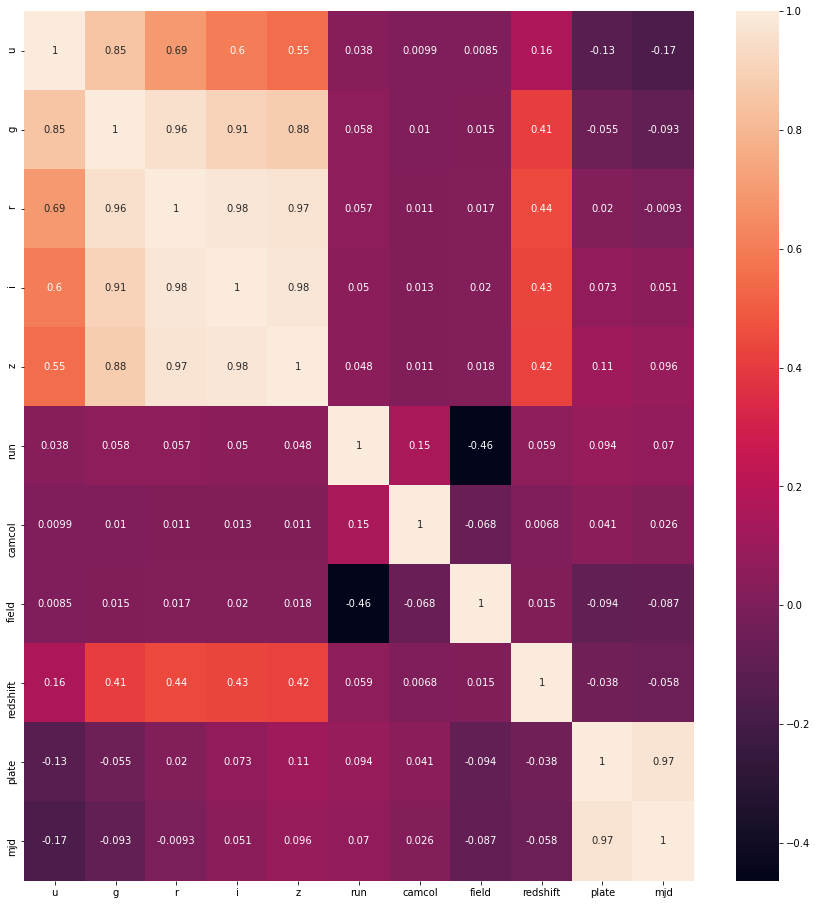

In [8]:
# heatmap correlation
import seaborn as sns
corr_hmap=df.corr()
plt.figure(figsize=(15,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Observation: Here lighter color of the cells represents highly correlated while darker represents low correlation. 
             we can clearly see that i is highly corelated with z and r while field is highly negatively corelated with run.

# Data Vizualization

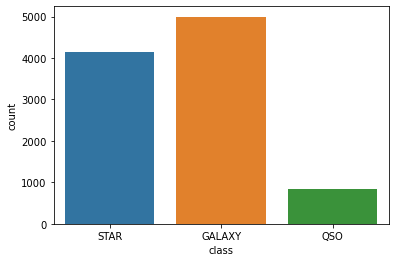

In [9]:
sns.countplot(x="class", data=df)

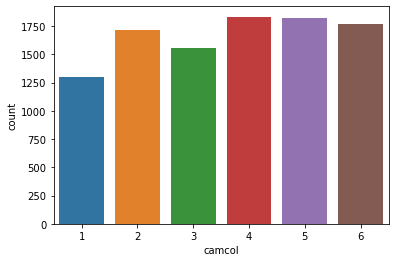

In [10]:
sns.countplot(df['camcol'])

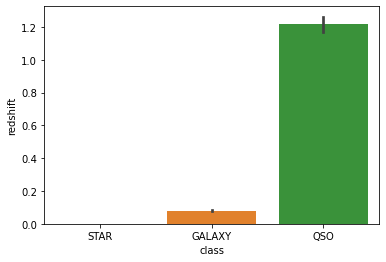

In [11]:
sns.barplot(y='redshift', x='class', data=df)

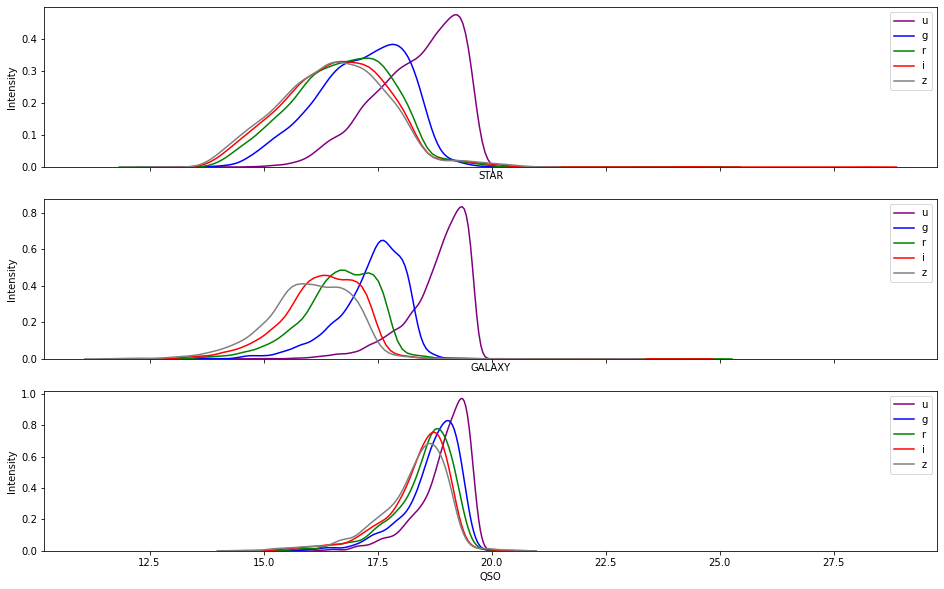

In [12]:
f,axes = plt.subplots(3, 1, figsize=(16, 10), sharex=True)
c = ['STAR', 'GALAXY', 'QSO']

for ax_id in range(3):
    sns.distplot(df.loc[df['class']==c[ax_id],'u'], hist=False, color='purple', ax=axes[ax_id], label='u')
    sns.distplot(df.loc[df['class']==c[ax_id],'g'], hist=False, color='blue', ax=axes[ax_id], label='g')
    sns.distplot(df.loc[df['class']==c[ax_id],'r'], hist=False, color='green', ax=axes[ax_id], label='r')
    sns.distplot(df.loc[df['class']==c[ax_id],'i'], hist=False, color='red', ax=axes[ax_id], label='i')
    sns.distplot(df.loc[df['class']==c[ax_id],'z'], hist=False, color='grey', ax=axes[ax_id], label='z')
    axes[ax_id].set(xlabel=c[ax_id], ylabel='Intensity')

In [13]:
#sns.pairplot(df, hue='class')

In [14]:
#sns.pairplot(df)

In [15]:
# encoding class column to numeric values

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['class']=le.fit_transform(df['class'].astype(str))

# EDA

u              AxesSubplot(0.125,0.536818;0.110714x0.343182)
g           AxesSubplot(0.257857,0.536818;0.110714x0.343182)
r           AxesSubplot(0.390714,0.536818;0.110714x0.343182)
i           AxesSubplot(0.523571,0.536818;0.110714x0.343182)
z           AxesSubplot(0.656429,0.536818;0.110714x0.343182)
run         AxesSubplot(0.789286,0.536818;0.110714x0.343182)
camcol            AxesSubplot(0.125,0.125;0.110714x0.343182)
field          AxesSubplot(0.257857,0.125;0.110714x0.343182)
class          AxesSubplot(0.390714,0.125;0.110714x0.343182)
redshift       AxesSubplot(0.523571,0.125;0.110714x0.343182)
plate          AxesSubplot(0.656429,0.125;0.110714x0.343182)
mjd            AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

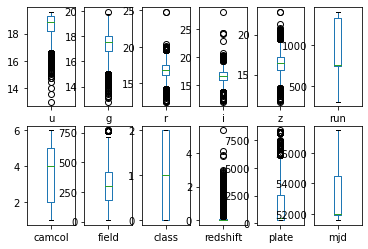

In [16]:
# Checking for outliers
df.plot.box(subplots=True,layout=(2,6))

In [17]:
# removing outliers

from scipy.stats import zscore

z=np.abs(zscore(df))
print(df.shape)
df=df.loc[(z<3).all(axis=1)]
print(df.shape)

(10000, 12)
(9084, 12)


In [18]:
df.skew()

u          -0.971868
g          -0.516324
r          -0.144772
i           0.062958
z           0.173410
run         0.497149
camcol     -0.076746
field       0.246549
class       0.272657
redshift    4.961951
plate       1.303989
mjd         0.954915
dtype: float64

In [19]:
#treating the skewness via log transform and cube root
df['u']=np.log1p(df['u'])
df['redshift']=np.cbrt(df['redshift'])
df['plate']=np.log1p(df['plate'])
df['mjd']=np.log1p(df['mjd'])

In [20]:
#again cheking the skewness
print(df.skew())


u          -1.052916
g          -0.516324
r          -0.144772
i           0.062958
z           0.173410
run         0.497149
camcol     -0.076746
field       0.246549
class       0.272657
redshift    0.392448
plate       0.725948
mjd         0.940057
dtype: float64


In [21]:
#splitting the data for training and test

x=df.drop(columns=['class']) 
y=df['class']

In [22]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

# Using GridsearchCv

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
# using GridsearchCV ti fing best parmeters of logistic regression
lg=LogisticRegression()
parameters={'C':[1,10],'random_state':range(42,100)}
clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
clf.best_params_

{'C': 10, 'random_state': 42}

In [27]:
# using GridsearchCV ti fing best parmeters of SVC
sv=SVC()
parameters={'kernel':['rbf','linear','poly']}
clf=GridSearchCV(sv,parameters)
clf.fit(x,y)
clf.best_params_

{'kernel': 'linear'}

In [28]:
# using GridsearchCV ti fing best parmeters of DTC
dt=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy']}
clf=GridSearchCV(dt,parameters)
clf.fit(x,y)
clf.best_params_

{'criterion': 'entropy'}

In [29]:
# using GridsearchCV ti fing best parmeters of KNN
kn=KNeighborsClassifier()
parameters={'n_neighbors':range(1,25)}
clf=GridSearchCV(kn,parameters)
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 3}

In [30]:
# using gridsearchCV for random forest
rfr=RandomForestClassifier()
estimator={'n_estimators':[50,100,150],'criterion':['gini','entropy']}
clf=GridSearchCV(rfr,estimator)
clf.fit(x,y)
clf.best_params_

{'criterion': 'entropy', 'n_estimators': 100}

In [31]:
# using GridsearchCV ti fing best parmeters of Adaboost
ad=AdaBoostClassifier()
estimator={'n_estimators':[50,100,150],'algorithm':['SAMME', 'SAMME.R']}
clf=GridSearchCV(ad,estimator)
clf.fit(x,y)
clf.best_params_

{'algorithm': 'SAMME', 'n_estimators': 50}

In [32]:
# using GridsearchCV ti fing best parmeters of Gradientboosting
gb=GradientBoostingClassifier()
estimator={'n_estimators':[50,100,150]}
clf=GridSearchCV(gb,estimator)
clf.fit(x,y)
clf.best_params_

{'n_estimators': 50}

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

# Sending to Model with best parameters


In [35]:
model=[LogisticRegression(C=10,random_state=42),SVC(kernel='linear'),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(criterion='entropy')]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of",m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n') 

Accuracy Score of LogisticRegression(C=10, random_state=42) is:
0.9889944972486243
[[1075    6    6]
 [   8   98    1]
 [   1    0  804]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1087
           1       0.94      0.92      0.93       107
           2       0.99      1.00      1.00       805

    accuracy                           0.99      1999
   macro avg       0.98      0.97      0.97      1999
weighted avg       0.99      0.99      0.99      1999



Accuracy Score of SVC(kernel='linear') is:
0.9884942471235618
[[1074    7    6]
 [   8   98    1]
 [   1    0  804]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1087
           1       0.93      0.92      0.92       107
           2       0.99      1.00      1.00       805

    accuracy                           0.99      1999
   macro avg       0.97      0.97      0.97      1999
weighted avg       0.99      0.99   

# Using ensembel techniques with best parameters

In [36]:
model=[RandomForestClassifier(n_estimators=150,criterion='entropy'),AdaBoostClassifier(n_estimators=50,algorithm='SAMME'),GradientBoostingClassifier(n_estimators=50)]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of",m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n') 

Accuracy Score of RandomForestClassifier(criterion='entropy', n_estimators=150) is:
0.9859929964982491
[[1074    8    5]
 [  13   93    1]
 [   1    0  804]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1087
           1       0.92      0.87      0.89       107
           2       0.99      1.00      1.00       805

    accuracy                           0.99      1999
   macro avg       0.97      0.95      0.96      1999
weighted avg       0.99      0.99      0.99      1999



Accuracy Score of AdaBoostClassifier(algorithm='SAMME') is:
0.9744872436218109
[[1050   33    4]
 [  12   94    1]
 [   1    0  804]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1087
           1       0.74      0.88      0.80       107
           2       0.99      1.00      1.00       805

    accuracy                           0.97      1999
   macro avg       0.91      0.95      0.93      1999

# Best Model

In [37]:
#so we get the best result in logistic regression model
lg=LogisticRegression(C=10,random_state=42)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('Accuracy score:',accuracy_score(y_test,pred))
print('confusion matrix:',confusion_matrix(y_test,pred))
print('classification report:',classification_report(y_test,pred))

Accuracy score: 0.9889944972486243
confusion matrix: [[1075    6    6]
 [   8   98    1]
 [   1    0  804]]
classification report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1087
           1       0.94      0.92      0.93       107
           2       0.99      1.00      1.00       805

    accuracy                           0.99      1999
   macro avg       0.98      0.97      0.97      1999
weighted avg       0.99      0.99      0.99      1999



# Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(lg,x,y,cv=5)
print(scores)
print(scores.mean(),scores.std())

[0.99009356 0.99284535 0.99504678 0.98624106 0.99339207]
0.9915237635740765 0.0030854911961566457


# Saving the Model

In [39]:
import joblib
joblib.dump(lg,'Project_8_Space_server.obj')

['Project_8_Space_server.obj']